In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
import glob
import math
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
import seaborn as sns
pd.options.mode.chained_assignment = None
style.use('seaborn-whitegrid') or plt.style.use('seaborn-whitegrid')

In [2]:
iotas = [0.5, 1]

data = {}

data['Iota' + str(iotas[0])] = pd.read_csv('../ModelOutputData/Iota05Time20000_3D/3D.csv')
data['Iota' + str(iotas[1])] = pd.read_csv('../ModelOutputData/Iota1Time20000_3D/3D.csv')


In [3]:

for i in iotas:
    values = data['Iota' + str(i)][['a2 1', 'a2 4', 'a2 5', 'a2 4', 'a2 2', 'a2 6', \
                                  'a2 5', 'a2 6', 'a2 3']].values.reshape(-1,3)
    eigs = LA.eigh(values.reshape((-1, 3, 3)))
    data['Iota' + str(i)]['a_lambda1'] = eigs[0][:,0]
    data['Iota' + str(i)]['a_lambda2'] = eigs[0][:,1]
    data['Iota' + str(i)]['a_lambda3'] = eigs[0][:,2]
    
    data['Iota' + str(i)]['a_ev1x'] = eigs[1][:,0,0]
    data['Iota' + str(i)]['a_ev1y'] = eigs[1][:,0,1]
    data['Iota' + str(i)]['a_ev1z'] = eigs[1][:,0,2]
    data['Iota' + str(i)]['a_ev2x'] = eigs[1][:,1,0]
    data['Iota' + str(i)]['a_ev2y'] = eigs[1][:,1,1]
    data['Iota' + str(i)]['a_ev2z'] = eigs[1][:,1,2]
    data['Iota' + str(i)]['a_ev3x'] = eigs[1][:,2,0]
    data['Iota' + str(i)]['a_ev3y'] = eigs[1][:,2,1]
    data['Iota' + str(i)]['a_ev3z'] = eigs[1][:,2,2]
    

In [4]:
# Calculate the log values

for i in iotas:
    data['Iota' + str(i)]['ln2/1'] = np.log(data['Iota' + str(i)]['a_lambda2'] / \
                                            data['Iota' + str(i)]['a_lambda1'])
    data['Iota' + str(i)]['ln3/2'] = np.log(data['Iota' + str(i)]['a_lambda3'] / \
                                            data['Iota' + str(i)]['a_lambda2'])


/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_43840/2714572692.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[0, 200, 400, 600])


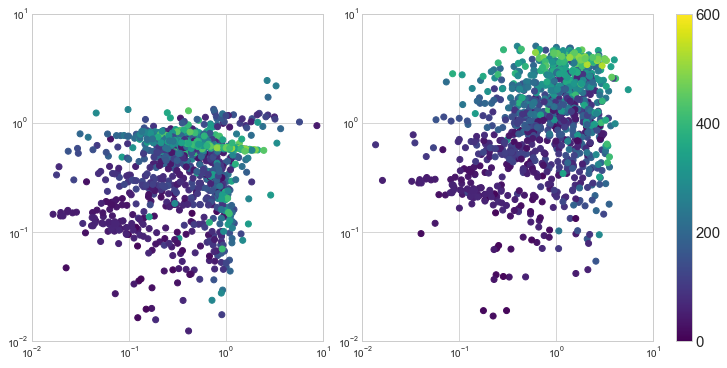

In [38]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
for i in range(2):
    CS = ax[i].scatter(data['Iota' + str(iotas[i])][data['Iota' + str(iotas[i])].index % 100 == 0]['ln2/1'], \
               data['Iota' + str(iotas[i])][data['Iota' + str(iotas[i])].index % 100 == 0]['ln3/2'], \
               c = data['Iota' + str(iotas[i])][data['Iota' + str(iotas[i])].index % 100 == 0]['depth'], \
                    cmap='viridis', vmin=0, vmax=600)
    ax[i].set_xlim(0.01, 10)
    ax[i].set_ylim(0.01, 10)
    ax[i].set_xscale("log")
    ax[i].set_yscale("log")
cbar = fig.colorbar(CS, ticks=[0, 200, 400, 600])
cbar.ax.tick_params(labelsize=15)


/var/folders/7m/lgqxn0610bs8sxwnf4k6z_hw0000gn/T/ipykernel_43840/3119787156.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(CS, ticks=[0, 200, 400, 600])


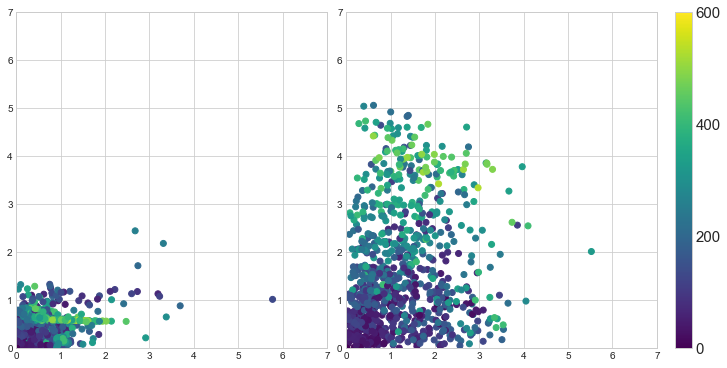

In [39]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')
for i in range(2):
    CS = ax[i].scatter(data['Iota' + str(iotas[i])][data['Iota' + str(iotas[i])].index % 100 == 0]['ln2/1'], \
               data['Iota' + str(iotas[i])][data['Iota' + str(iotas[i])].index % 100 == 0]['ln3/2'], \
               c = data['Iota' + str(iotas[i])][data['Iota' + str(iotas[i])].index % 100 == 0]['depth'], \
                    cmap='viridis', vmin=0, vmax=600)
    ax[i].set_xlim(0.0, 7)
    ax[i].set_ylim(0.0, 7)
cbar = fig.colorbar(CS, ticks=[0, 200, 400, 600])
cbar.ax.tick_params(labelsize=15)
